<a href="https://colab.research.google.com/github/kihagama/hero/blob/main/empirical_reliability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

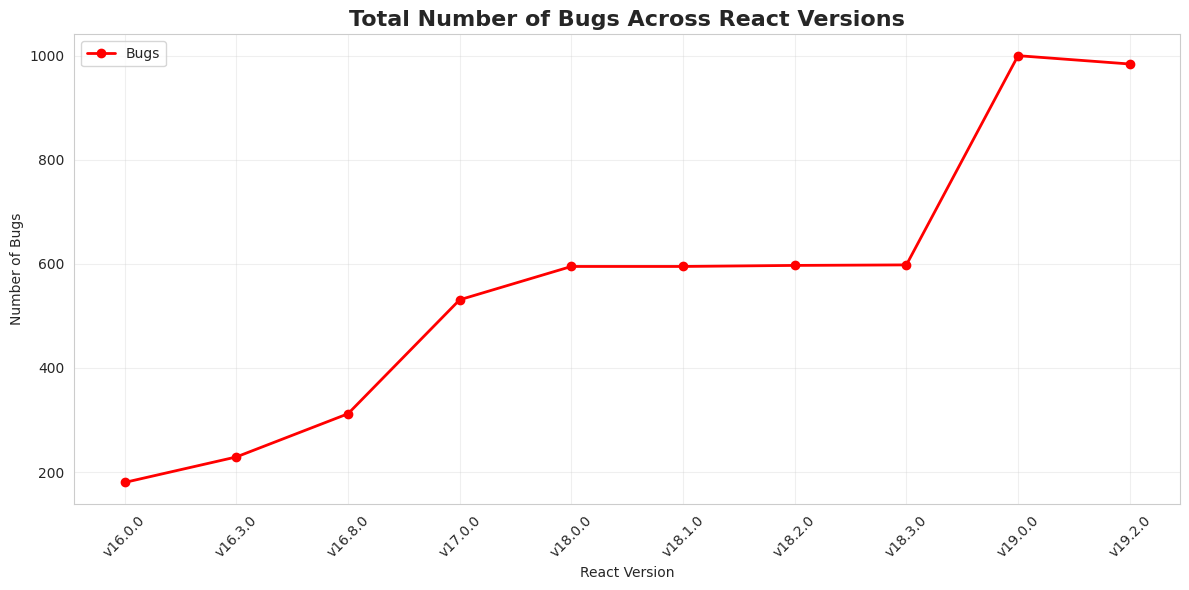

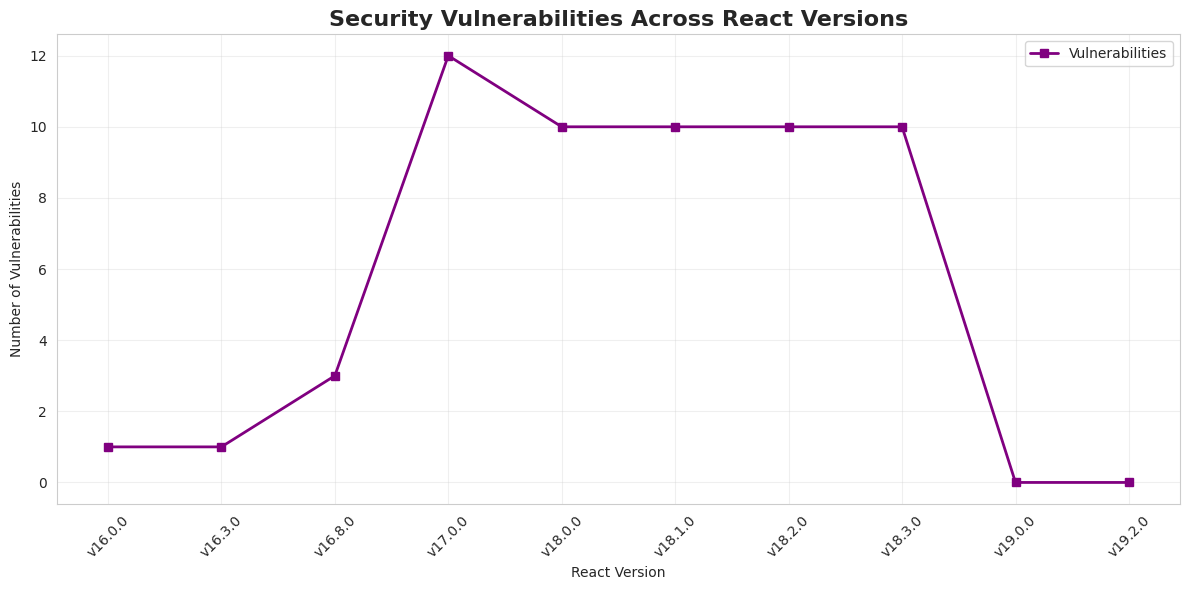

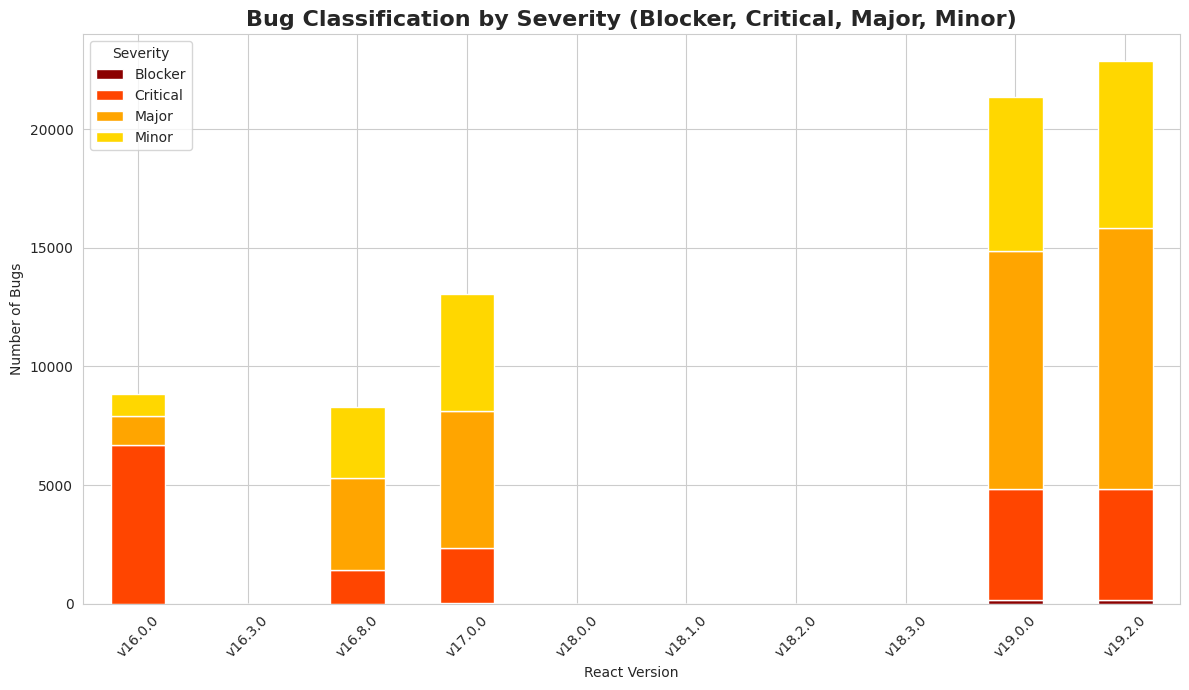

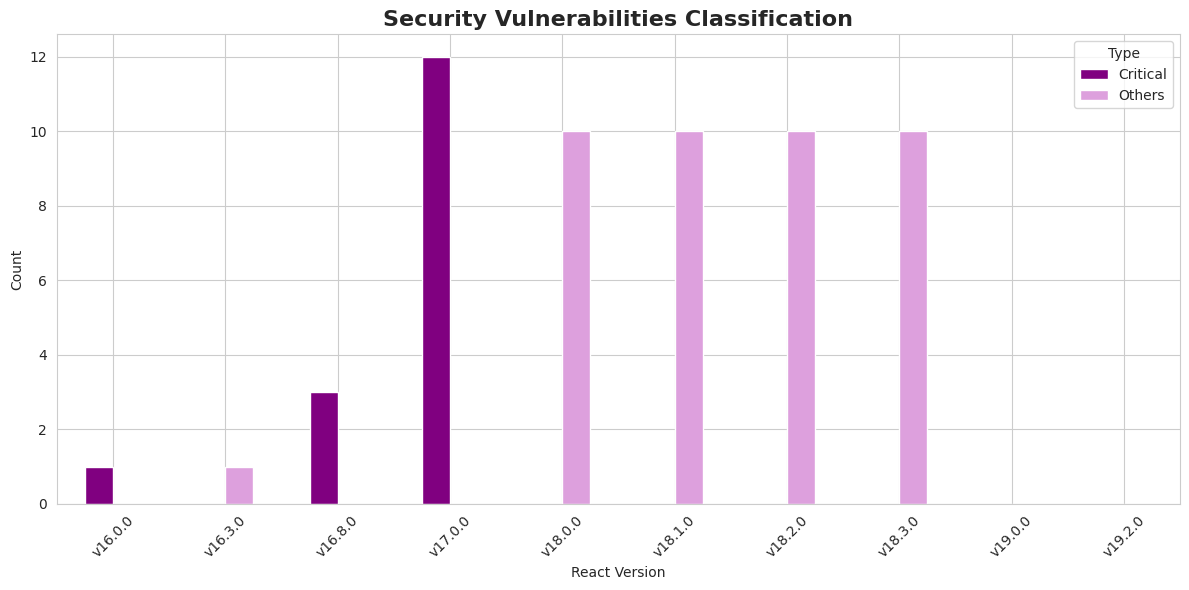

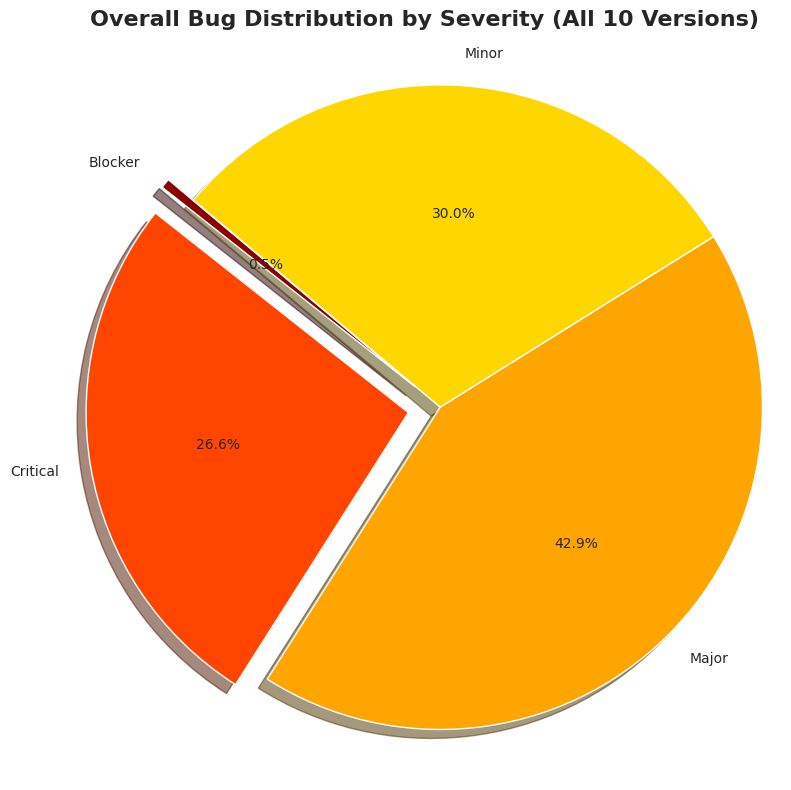

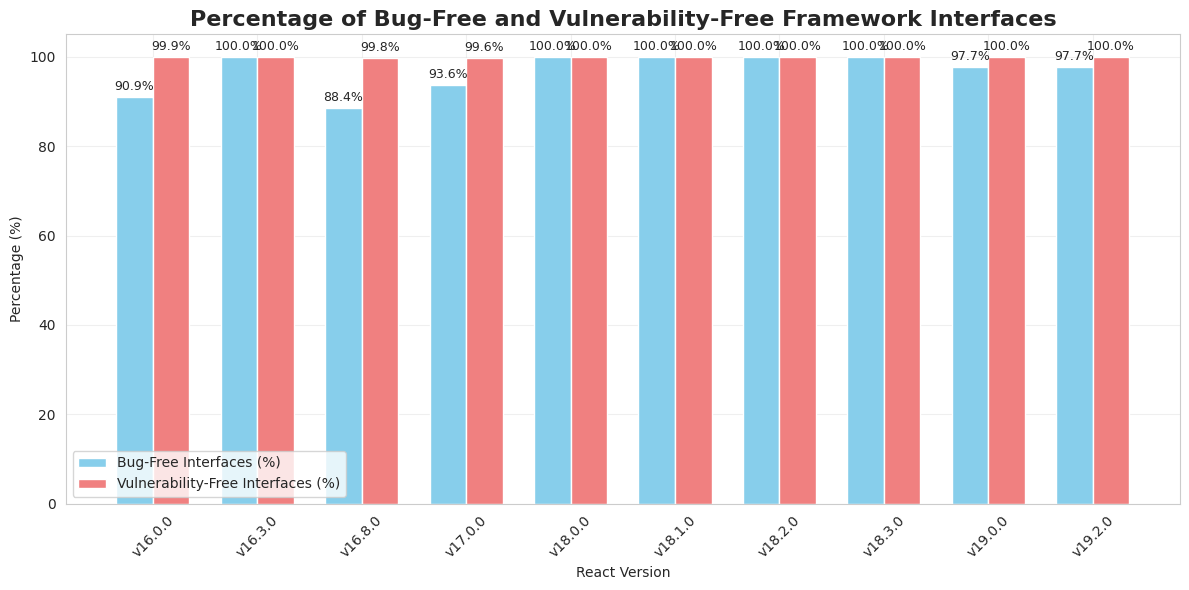


SUMMARY TABLE:


,Version,Bugs,Vulnerabilities,Total Interfaces,Bug-Free %,Vuln-Free %
0,v16.0.0,180,1,707,90.95%,99.86%
1,v16.3.0,229,1,637,100.00%,100.00%
2,v16.8.0,312,3,865,88.44%,99.77%
3,v17.0.0,531,12,1555,93.57%,99.61%
4,v18.0.0,595,10,1932,100.00%,100.00%
5,v18.1.0,595,10,1943,100.00%,100.00%
6,v18.2.0,597,10,1963,100.00%,100.00%
7,v18.3.0,598,10,1964,100.00%,100.00%
8,v19.0.0,1000,0,4407,97.73%,100.00%
9,v19.2.0,984,0,4402,97.73%,100.00%


In [5]:

# Import libraries and define data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Versions
versions = [
    'v16.0.0', 'v16.3.0', 'v16.8.0', 'v17.0.0', 'v18.0.0',
    'v18.1.0', 'v18.2.0', 'v18.3.0', 'v19.0.0', 'v19.2.0'
]

# 1. Total Bugs
bugs = [180, 229, 312, 531, 595, 595, 597, 598, 1000, 984]

# 2. Security Vulnerabilities
vulnerabilities = [1, 1, 3, 12, 10, 10, 10, 10, 0, 0]

# 3. Bug Classification (Blocker, Critical, Major, Minor)
bug_classification = {
    'Blocker': [7, 0, 10, 34, 0, 0, 0, 0, 154, 152],
    'Critical': [6700, 0, 1400, 2300, 0, 0, 0, 0, 4700, 4700],
    'Major': [1200, 0, 3900, 5800, 0, 0, 0, 0, 10000, 11000],
    'Minor': [922, 0, 3000, 4900, 0, 0, 0, 0, 6500, 7000]
}

# 4. Security Classification (only critical in some)
sec_classification = {
    'Critical': [1, 0, 3, 12, 0, 0, 0, 0, 0, 0],
    'Others': [0, 1, 0, 0, 10, 10, 10, 10, 0, 0]  # unclassified or none
}

# 5. Interface Metrics
total_interfaces = [707, 637, 865, 1555, 1932, 1943, 1963, 1964, 4407, 4402]
buggy_interfaces = [64, 0, 100, 100, 0, 0, 0, 0, 100, 100]
vuln_interfaces = [1, 0, 2, 6, 0, 0, 0, 0, 0, 0]

bug_free_pct = [(t - b)/t * 100 for t, b in zip(total_interfaces, buggy_interfaces)]
vuln_free_pct = [(t - v)/t * 100 for t, v in zip(total_interfaces, vuln_interfaces)]

# PLOT 1: Line Chart - Bugs Over Time
plt.figure(figsize=(12, 6))
plt.plot(versions, bugs, marker='o', color='red', linewidth=2, label='Bugs')
plt.title('Total Number of Bugs Across React Versions', fontsize=16, fontweight='bold')
plt.xlabel('React Version')
plt.ylabel('Number of Bugs')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# --- PLOT 2: Line Chart - Vulnerabilities Over Time ---
plt.figure(figsize=(12, 6))
plt.plot(versions, vulnerabilities, marker='s', color='purple', linewidth=2, label='Vulnerabilities')
plt.title('Security Vulnerabilities Across React Versions', fontsize=16, fontweight='bold')
plt.xlabel('React Version')
plt.ylabel('Number of Vulnerabilities')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#PLOT 3: Stacked Bar Chart - Bug Classification
df_bugs = pd.DataFrame(bug_classification, index=versions)
df_bugs.plot(kind='bar', stacked=True, figsize=(12, 7),
             color=['#8B0000', '#FF4500', '#FFA500', '#FFD700'])
plt.title('Bug Classification by Severity (Blocker, Critical, Major, Minor)', fontsize=16, fontweight='bold')
plt.xlabel('React Version')
plt.ylabel('Number of Bugs')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

#PLOT 4: Bar Chart - Security Vulnerabilities Classification
df_sec = pd.DataFrame(sec_classification, index=versions)
df_sec.plot(kind='bar', figsize=(12, 6), color=['#800080', '#DDA0DD'])
plt.title('Security Vulnerabilities Classification', fontsize=16, fontweight='bold')
plt.xlabel('React Version')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

#PLOT 5: Pie Chart - Overall Bug Distribution by Severity
total_blocker = sum(bug_classification['Blocker'])
total_critical = sum(bug_classification['Critical'])
total_major = sum(bug_classification['Major'])
total_minor = sum(bug_classification['Minor'])

labels = ['Blocker', 'Critical', 'Major', 'Minor']
sizes = [total_blocker, total_critical, total_major, total_minor]
colors = ['#8B0000', '#FF4500', '#FFA500', '#FFD700']
explode = (0.1, 0.1, 0, 0)  # explode Blocker & Critical

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Overall Bug Distribution by Severity (All 10 Versions)', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

#PLOT 6: Dual Bar Chart - % Bug-Free vs % Vulnerability-Free Interfaces
x = np.arange(len(versions))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, bug_free_pct, width, label='Bug-Free Interfaces (%)', color='skyblue')
bars2 = ax.bar(x + width/2, vuln_free_pct, width, label='Vulnerability-Free Interfaces (%)', color='lightcoral')

ax.set_title('Percentage of Bug-Free and Vulnerability-Free Framework Interfaces', fontsize=16, fontweight='bold')
ax.set_xlabel('React Version')
ax.set_ylabel('Percentage (%)')
ax.set_xticks(x)
ax.set_xticklabels(versions, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)

# Add percentage labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()

#SUMMARY TABLE
summary = pd.DataFrame({
    'Version': versions,
    'Bugs': bugs,
    'Vulnerabilities': vulnerabilities,
    'Total Interfaces': total_interfaces,
    'Bug-Free %': [f"{x:.2f}%" for x in bug_free_pct],
    'Vuln-Free %': [f"{x:.2f}%" for x in vuln_free_pct]
})
print("\nSUMMARY TABLE:")
display(summary)